# AutoML Regressor

**Toda la información presentada en este trabajo fue extraída de**:<BR>
* [PyCaret](https://pycaret.org/)
* [Automated Machine Learning](https://www.packtpub.com/product/automated-machine-learning/9781800567689)
* [Hands-On Automated Machine Learning](https://www.packtpub.com/product/hands-on-automated-machine-learning/9781788629898)

__________________________

Concepto importante para el futuro científico de datos:<BR>
***Subject-matter expert***: Un experto en la materia es una persona que es una autoridad en un área o tema en particular (Wikipedia)

Excelentes artículos para entender la validez del Automated Machine Learning:<BR>
[A Few Useful Things to Know About Machine Learning](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf) <BR>
[Automated Machine Learning vs Automated Data Science](https://www.kdnuggets.com/2018/07/automated-machine-learning-vs-automated-data-science.html)

___________________________

Vocabulario técnico: <BR>
* ***FMS***: Full Model Selection<BR>
* ***CASH***: Combined Algorithm Selection and Hyperparameter<BR>
* ***AutoDL***: automated deep learning <BR>
* ***DARTS***: Differentiable Architecture Search<BR>
* ***Hyperparameter optimization***:  hyperparameter tuning / hyperparameter learning / automated pipeline learning.

_______________________

### The ML life cycle

![ML life cycle](./img/mlcl.png)

_________________________

### AutoML pipeline by Waring et al

![Auto ML life cycle](./img/amlcl.png)

____________________

### Automated ML pipeline. He, et al., 2019

![GitHub Logo](./img/amlcl1.png)

_______________

## Regresión

In [6]:
from pycaret.datasets import get_data
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [7]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5400, 8)
Unseen Data For Predictions: (600, 8)


In [8]:
from pycaret.regression import *

In [9]:
exp_reg101 = setup(data = data, target = 'Price', session_id=1002)

,Description,Value
0,session_id,1002
1,Target,Price
2,Original Data,"(5400, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3779, 28)"


In [10]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,670.3672,2029551.7875,1375.1968,0.9808,0.0720,0.0534,0.5930
et,Extra Trees Regressor,726.9144,2506874.1460,1510.9735,0.9765,0.0806,0.0590,0.3800
rf,Random Forest Regressor,737.4302,2653351.0760,1560.2395,0.9751,0.0799,0.0588,0.3410
lightgbm,Light Gradient Boosting Machine,743.8178,3151504.1450,1701.4942,0.9706,0.0776,0.0565,0.1140
gbr,Gradient Boosting Regressor,888.7229,3302715.9988,1768.8239,0.9683,0.1008,0.0758,0.0870
dt,Decision Tree Regressor,983.8926,4514804.7055,2089.6746,0.9556,0.1080,0.0778,0.0720
ridge,Ridge Regression,2421.6021,14668356.3000,3788.1559,0.8574,0.6507,0.2861,0.4070
br,Bayesian Ridge,2419.2538,14665763.6246,3787.7583,0.8574,0.6612,0.2859,0.2110
lasso,Lasso Regression,2415.8173,14691505.1000,3790.1108,0.8572,0.6653,0.2851,0.0600
llar,Lasso Least Angle Regression,2360.1435,14741915.9212,3793.6336,0.8569,0.6662,0.2713,0.0070


Métricas________________________________________________________________________________________________________________<BR>
* #### [Regression: An Explanation of Regression Metrics And What Can Go Wrong](https://towardsdatascience.com/regression-an-explanation-of-regression-metrics-and-what-can-go-wrong-a39a9793d914)
* #### [3 Best metrics to evaluate Regression Model?](https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b)
* #### [Know The Best Evaluation Metrics for Your Regression Model !](https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/)
* #### [Error Cuadrático Medio para Regresión](https://www.iartificial.net/error-cuadratico-medio-para-regresion/)

### Extreme Gradient Boosting

In [11]:
xgboost = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,750.5492,5713528.0000,2390.2988,0.9558,0.0755,0.0525
1,699.8638,2149327.0000,1466.0583,0.9784,0.0744,0.0556
2,697.6198,1694377.0000,1301.6824,0.9851,0.0823,0.0587
3,616.7447,1486155.6250,1219.0798,0.9845,0.0682,0.0507
4,735.1243,2487427.7500,1577.1581,0.9797,0.0754,0.0570
5,673.3153,1552934.6250,1246.1680,0.9838,0.0710,0.0531
6,607.3341,1103893.6250,1050.6635,0.9872,0.0668,0.0506
7,647.4861,1637996.3750,1279.8423,0.9825,0.0690,0.0509
8,640.1541,1143097.7500,1069.1575,0.9853,0.0689,0.0526
9,635.4803,1326780.1250,1151.8594,0.9857,0.0679,0.0519


In [13]:
print(xgboost)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=1002, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
             validate_parameters=1, verbosity=0)


### Extra Trees Regressor

In [14]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,816.6583,7699461.2879,2774.7903,0.9404,0.0864,0.0578
1,802.6751,3053312.1183,1747.3729,0.9693,0.0845,0.0630
2,762.0139,1791700.5416,1338.5442,0.9842,0.0885,0.0651
3,650.4933,1374722.0178,1172.4854,0.9856,0.0734,0.0539
4,739.1646,3258126.7088,1805.0282,0.9735,0.0761,0.0559
5,714.3472,1716199.0095,1310.0378,0.9821,0.0825,0.0583
6,709.3548,1573397.3542,1254.3514,0.9817,0.0792,0.0600
7,703.7250,1692399.6722,1300.9226,0.9819,0.0765,0.0571
8,653.6092,1249703.2686,1117.9013,0.9839,0.0776,0.0584
9,717.1020,1659719.4813,1288.3010,0.9821,0.0817,0.0608


In [15]:
print(et)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=1002, verbose=0, warm_start=False)


### Random Forest Regressor

In [16]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,793.4597,7018187.3779,2649.1862,0.9457,0.0837,0.0565
1,822.5519,3531172.1360,1879.1413,0.9645,0.0885,0.0638
2,775.5879,2125863.3491,1458.0341,0.9813,0.0870,0.0652
3,694.2880,1702494.6753,1304.7968,0.9822,0.0747,0.0565
4,804.1349,4020854.1488,2005.2068,0.9672,0.0807,0.0587
5,774.4832,2542700.0009,1594.5846,0.9735,0.0842,0.0600
6,672.2366,1167366.7021,1080.4475,0.9864,0.0763,0.0584
7,686.4392,1821689.7372,1349.6999,0.9805,0.0741,0.0541
8,661.5065,1250021.6454,1118.0437,0.9839,0.0753,0.0569
9,689.6142,1353160.9867,1163.2545,0.9854,0.0746,0.0579


In [17]:
print(rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=1002, verbose=0, warm_start=False)


### Light Gradient Boosting Machine

In [18]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,884.5358,8452267.8661,2907.2784,0.9346,0.0886,0.0571
1,738.7621,2792529.4100,1671.0863,0.9720,0.0763,0.0567
2,849.6339,3328931.1930,1824.5359,0.9707,0.0910,0.0643
3,685.0858,2208804.3083,1486.2047,0.9769,0.0747,0.0561
4,864.4685,5435439.5401,2331.4029,0.9557,0.0782,0.0582
5,699.6071,2357632.4540,1535.4584,0.9754,0.0742,0.0538
6,672.6809,1689223.3100,1299.7012,0.9803,0.0729,0.0553
7,631.5034,1646114.3575,1283.0099,0.9824,0.0696,0.0512
8,658.3341,1515660.8422,1231.1218,0.9805,0.0726,0.0542
9,753.5660,2088438.1690,1445.1430,0.9775,0.0780,0.0577


In [19]:
print(lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=1002, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


### Tune

In [20]:
xgboost_tuned = tune_model(xgboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,802.4375,5131378.0000,2265.2544,0.9603,0.0767,0.0562
1,668.6154,1941837.2500,1393.4982,0.9805,0.0712,0.0531
2,709.7005,1888138.0000,1374.0953,0.9834,0.0829,0.0589
3,638.4428,1804860.6250,1343.4510,0.9811,0.0691,0.0513
4,756.9039,2702988.5000,1644.0768,0.9780,0.0738,0.0564
5,678.0309,1687906.7500,1299.1947,0.9824,0.0693,0.0523
6,595.1127,945172.6250,972.1999,0.9890,0.0673,0.0510
7,637.3273,1516786.2500,1231.5787,0.9838,0.0699,0.0511
8,647.3177,1261205.1250,1123.0339,0.9838,0.0727,0.0531
9,633.3726,1300349.2500,1140.3286,0.9860,0.0690,0.0525


In [23]:
print(xgboost_tuned)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=1002, reg_alpha=5,
             reg_lambda=4, scale_pos_weight=35.800000000000004, subsample=0.5,
             tree_method='auto', validate_parameters=1, verbosity=0)


In [21]:
et_tuned = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1018.7607,7127706.3423,2669.7765,0.9448,0.1002,0.0705
1,999.3399,5980274.7014,2445.4600,0.9399,0.0973,0.0729
2,988.1693,4109663.0699,2027.2304,0.9638,0.1022,0.0769
3,865.4620,2944962.7450,1716.0894,0.9692,0.0952,0.0734
4,1061.2475,6915095.4509,2629.6569,0.9437,0.1052,0.0768
5,941.2912,3808985.4193,1951.6622,0.9602,0.0990,0.0724
6,862.5548,2147778.1420,1465.5300,0.9750,0.1039,0.0770
7,921.4694,4004610.5369,2001.1523,0.9572,0.0911,0.0689
8,845.6771,2296875.4837,1515.5446,0.9705,0.0993,0.0725
9,873.0084,2706319.9744,1645.0897,0.9708,0.0962,0.0701


In [22]:
print(et_tuned)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                    max_depth=9, max_features=1.0, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.05,
                    min_impurity_split=None, min_samples_leaf=5,
                    min_samples_split=9, min_weight_fraction_leaf=0.0,
                    n_estimators=20, n_jobs=-1, oob_score=False,
                    random_state=1002, verbose=0, warm_start=False)


In [24]:
rf_tuned = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1319.2005,11489298.5591,3389.5868,0.9111,0.1249,0.0870
1,1225.7581,6290095.6905,2508.0063,0.9368,0.1197,0.0917
2,1234.8899,7040683.8151,2653.4287,0.9380,0.1300,0.0937
3,917.5987,2835799.9735,1683.9834,0.9704,0.1105,0.0826
4,1194.4034,7463441.3056,2731.9300,0.9392,0.1200,0.0893
5,1133.1099,5540116.5333,2353.7452,0.9422,0.1223,0.0879
6,1060.8283,3647025.5812,1909.7187,0.9576,0.1298,0.0919
7,1102.6536,6602859.2864,2569.6029,0.9294,0.1185,0.0829
8,1035.8444,3896329.1853,1973.9122,0.9499,0.1178,0.0833
9,1064.4133,4329585.9375,2080.7657,0.9533,0.1172,0.0845


In [25]:
print(rf_tuned)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                      max_depth=9, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.05,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=9, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=-1, oob_score=False,
                      random_state=1002, verbose=0, warm_start=False)


In [26]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'learning_rate': np.arange(0.1,1,0.1)
              }

In [27]:
lightgbm_tuned = tune_model(lightgbm, custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,816.2894,8831475.8163,2971.7799,0.9316,0.0874,0.0544
1,728.0740,2122825.9975,1456.9921,0.9787,0.0793,0.0592
2,854.5776,2723295.3235,1650.2410,0.9760,0.0910,0.0671
3,693.8473,1711627.8388,1308.2920,0.9821,0.0752,0.0561
4,821.6138,3773753.3950,1942.6151,0.9692,0.0827,0.0584
5,765.1471,2306610.6698,1518.7530,0.9759,0.0775,0.0582
6,664.5386,1448013.7574,1203.3344,0.9831,0.0722,0.0550
7,665.9127,1480676.1056,1216.8304,0.9842,0.0718,0.0546
8,691.0351,1369656.8416,1170.3234,0.9824,0.0732,0.0566
9,793.7454,2300254.9394,1516.6591,0.9752,0.0864,0.0628


In [28]:
print(lightgbm_tuned)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.30000000000000004,
              max_depth=20, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=130,
              objective=None, random_state=1002, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)


### Residual Plot

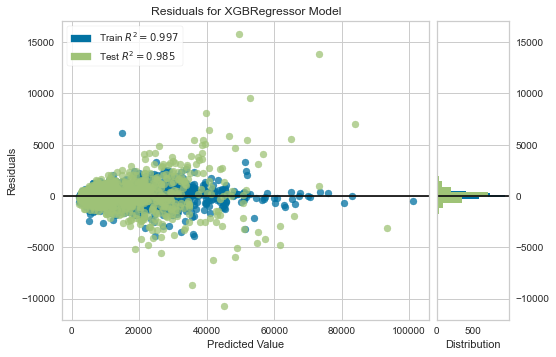

In [29]:
plot_model(xgboost_tuned)

### Prediction Error Plot

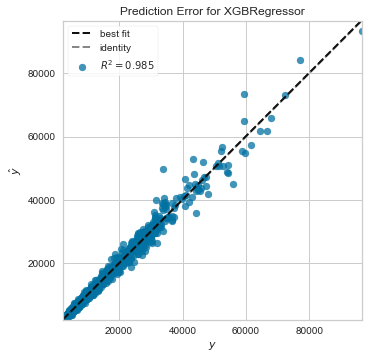

In [30]:
plot_model(xgboost_tuned, plot = 'error')

### Feature Importance Plot

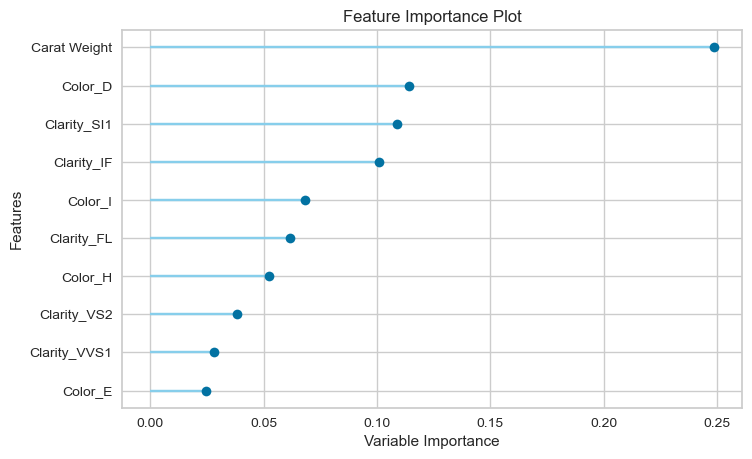

In [31]:
plot_model(xgboost_tuned, plot='feature')

______________

### Predict

In [32]:
predict_model(xgboost_tuned)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,660.9804,1649619.1250,1284.3750,0.9851,0.0686,0.0515


,Carat Weight,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,Color_G,...,Polish_G,Polish_ID,Polish_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA,Price,Label
0,1.07,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,11019.0,10224.225586
1,1.80,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,16195.0,18267.029297
2,2.01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,23652.0,25220.621094
3,1.03,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7184.0,7175.066895
4,1.02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6613.0,6955.310547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,0.78,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2816.0,2892.939209
1617,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,4447.0,4511.141602
1618,2.04,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,15511.0,16665.392578
1619,1.00,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,5642.0,5236.820312


### Finalize

In [33]:
xgboost_final = finalize_model(xgboost_tuned)

In [34]:
print(xgboost_final)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=1002, reg_alpha=5,
             reg_lambda=4, scale_pos_weight=35.800000000000004, subsample=0.5,
             tree_method='auto', validate_parameters=1, verbosity=0)


In [35]:
predict_model(xgboost_final)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,375.9010,353468.8750,594.5324,0.9968,0.0504,0.0374


,Carat Weight,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,Color_G,...,Polish_G,Polish_ID,Polish_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA,Price,Label
0,1.07,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,11019.0,10654.458984
1,1.80,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,16195.0,15888.664062
2,2.01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,23652.0,24175.992188
3,1.03,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7184.0,7304.087402
4,1.02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6613.0,7304.988770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,0.78,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2816.0,2614.959473
1617,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,4447.0,4523.890137
1618,2.04,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,15511.0,15953.079102
1619,1.00,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,5642.0,5300.798340


_____________

In [36]:
unseen_predictions = predict_model(xgboost_final, data=data_unseen)
unseen_predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,12414.727539
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,9506.720703
2,1.01,Good,E,SI1,G,G,GIA,5161,5075.627930
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,34400.054688
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4097.317383


In [37]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.Price, unseen_predictions.Label, 'R2')

0.9848

___________________________________

In [1]:
from pycaret.datasets import get_data
data = get_data('kiva')

,country,en,gender,loan_amount,nonpayment,sector,status
0,Dominican Republic,"""Banco Esperanza"" is a group of 10 women looki...",F,1225,partner,Retail,0
1,Dominican Republic,"""Caminemos Hacia Adelante"" or ""Walking Forward...",F,1975,lender,Clothing,0
2,Dominican Republic,"""Creciendo Por La Union"" is a group of 10 peop...",F,2175,partner,Clothing,0
3,Dominican Republic,"""Cristo Vive"" (""Christ lives"" is a group of 10...",F,1425,partner,Clothing,0
4,Dominican Republic,"""Cristo Vive"" is a large group of 35 people, 2...",F,4025,partner,Food,0


In [2]:
data = data.sample(1000, random_state=786).reset_index(drop=True)
data.shape

(1000, 7)

In [3]:
from pycaret.nlp import *
exp_nlp101 = setup(data = data, target = 'en', session_id = 1003)

Description,Value
session_id,1003
Documents,1000
Vocab Size,4615
Custom Stopwords,False


[LDA: Latent Dirichlet Allocation](https://es.wikipedia.org/wiki/Latent_Dirichlet_Allocation):  Modelo generativo que permite que conjuntos de observaciones puedan ser explicados por grupos no observados que explican porqué algunas partes de los datos son similares (Wikipedia)

In [4]:
lda = create_model('lda')

In [5]:
print(lda)

LdaModel(num_terms=4615, num_topics=4, decay=0.5, chunksize=100)


In [6]:
lda2 = create_model('lda', num_topics = 6, multi_core = True)

In [7]:
print(lda2)

LdaModel(num_terms=4615, num_topics=6, decay=0.5, chunksize=100)


In [8]:
lda_results = assign_model(lda)
lda_results.head()

,country,en,gender,loan_amount,nonpayment,sector,status,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,Kenya,praxide marry child primary school train tailo...,F,75,partner,Services,0,0.125544,0.871285,0.002718,0.000453,Topic 1,0.87
1,Kenya,gynaecology practitioner run year old life wif...,M,1200,partner,Health,0,0.158613,0.838336,0.002614,0.000437,Topic 1,0.84
2,Dominican Republic,live child boy girl range year old sell new us...,F,150,partner,Clothing,0,0.913306,0.082944,0.003214,0.000536,Topic 0,0.91
3,Kenya,phanice marry child daughter secondary school ...,F,150,lender,Services,1,0.277318,0.507453,0.214668,0.000561,Topic 1,0.51
4,Kenya,year old hotel last year get good return compe...,F,300,lender,Food,1,0.383501,0.450304,0.165715,0.000481,Topic 1,0.45


In [9]:
plot_model()

In [10]:
plot_model(plot = 'bigram')

In [11]:
plot_model(lda, plot = 'frequency', topic_num = 'Topic 1')

In [12]:
plot_model(lda, plot = 'topic_distribution')

***[t-distributed stochastic neighbor embedding (t-SNE)](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)***:método estadístico para visualizar datos de alta dimensión dando a cada punto de datos una ubicación en un mapa bidimensional o tridimensional (Wikipedia)

In [13]:
plot_model(lda, plot = 'tsne')

***[How Exactly UMAP Works](https://towardsdatascience.com/how-exactly-umap-works-13e3040e1668)***

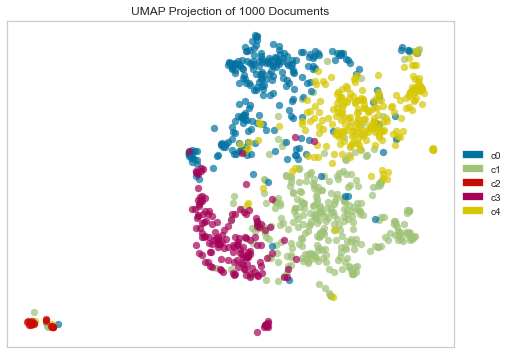

In [14]:
plot_model(lda, plot = 'umap')

In [26]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

______________

***Otros Modelos en PyCaret***
* [Anomaly Detection](https://github.com/pycaret/pycaret/blob/master/tutorials/Anomaly%20Detection%20Tutorial%20Level%20Beginner%20-%20ANO101.ipynb)
* [Association Rule](https://github.com/pycaret/pycaret/blob/master/tutorials/Association%20Rule%20Mining%20Tutorial%20-%20ARUL01.ipynb)
* [Binary Classification](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb)
* [Clustering](https://github.com/pycaret/pycaret/blob/master/tutorials/Clustering%20Tutorial%20Level%20Beginner%20-%20CLU101.ipynb)
* [Multiclass Classification](https://github.com/pycaret/pycaret/blob/master/tutorials/Multiclass%20Classification%20Tutorial%20Level%20Beginner%20-%20MCLF101.ipynb)

_______________________

## [MLFlow: Open ource platform for the machine learning lifecycle](https://mlflow.org/)

In [16]:
from pycaret.datasets import get_data
data = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
from pycaret.classification import *

In [18]:
clf1 = setup(data, target = 'Class variable', session_id = 1004, log_experiment = True, experiment_name = 'diabetes_01')

,Description,Value
0,session_id,1004
1,Target,Class variable
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [19]:
top5 = compare_models(n_select = 5) 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7581,0.0000,0.5383,0.7098,0.6056,0.4369,0.4498,0.0580
rf,Random Forest Classifier,0.7563,0.8036,0.5547,0.6948,0.6097,0.4371,0.4474,0.1890
lr,Logistic Regression,0.7544,0.8059,0.5599,0.6886,0.6126,0.4365,0.4449,3.3770
lda,Linear Discriminant Analysis,0.7525,0.8016,0.5439,0.6873,0.6010,0.4267,0.4365,0.0280
et,Extra Trees Classifier,0.7414,0.7818,0.5605,0.6612,0.5977,0.4112,0.4201,0.1280
ada,Ada Boost Classifier,0.7395,0.7822,0.5488,0.6588,0.5908,0.4041,0.4124,0.0490
gbc,Gradient Boosting Classifier,0.7357,0.7937,0.5433,0.6536,0.5831,0.3944,0.4041,0.0660
xgboost,Extreme Gradient Boosting,0.7301,0.7843,0.5804,0.6292,0.5949,0.3952,0.4021,0.3070
lightgbm,Light Gradient Boosting Machine,0.7300,0.7957,0.5643,0.6323,0.5873,0.3900,0.3972,0.1130
knn,K Neighbors Classifier,0.7152,0.7420,0.5494,0.6084,0.5706,0.3605,0.3664,0.0250


In [21]:
tuned_top5 = [tune_model(i) for i in top5]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6111,0.7160,0.7222,0.4483,0.5532,0.2410,0.2626
1,0.7593,0.7895,0.6842,0.6500,0.6667,0.4785,0.4788
2,0.7593,0.8737,0.7895,0.6250,0.6977,0.5021,0.5116
3,0.7222,0.8075,0.7368,0.5833,0.6512,0.4255,0.4336
4,0.7222,0.7714,0.6316,0.6000,0.6154,0.3982,0.3985
5,0.7222,0.7113,0.7895,0.5769,0.6667,0.4383,0.4542
6,0.8148,0.8632,0.8421,0.6957,0.7619,0.6126,0.6201
7,0.7547,0.8730,0.7778,0.6087,0.6829,0.4877,0.4975
8,0.6981,0.7397,0.6111,0.5500,0.5789,0.3447,0.3458
9,0.8491,0.8794,0.8333,0.7500,0.7895,0.6723,0.6746


#### [Ensemble Model](https://pycaret.org/ensemble-model/)

In [22]:
bagged_top5 = [ensemble_model(i) for i in tuned_top5]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5741,0.6759,0.6111,0.4074,0.4889,0.1481,0.1571
1,0.7407,0.8060,0.6842,0.6190,0.6500,0.4449,0.4463
2,0.7963,0.8902,0.7368,0.7000,0.7179,0.5587,0.5591
3,0.7407,0.8180,0.7368,0.6087,0.6667,0.4577,0.4633
4,0.7037,0.7624,0.5789,0.5789,0.5789,0.3504,0.3504
5,0.6852,0.7353,0.6316,0.5455,0.5854,0.3338,0.3361
6,0.7778,0.8677,0.6316,0.7059,0.6667,0.5008,0.5025
7,0.7736,0.8651,0.7222,0.6500,0.6842,0.5085,0.5102
8,0.6792,0.7175,0.3889,0.5385,0.4516,0.2332,0.2394
9,0.8491,0.8778,0.7778,0.7778,0.7778,0.6635,0.6635


#### [Blend Models](https://pycaret.org/blend-models/) 
<BR>Combinar diferentes algoritmos de ML y usar el voto mayoritario o las probabilidades promedio predichas en caso de clasificación para predecir el resultado final.

In [23]:
blender = blend_models(estimator_list = top5) 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6481,0.0000,0.5556,0.4762,0.5128,0.2400,0.2417
1,0.7407,0.0000,0.5263,0.6667,0.5882,0.4028,0.4088
2,0.7963,0.0000,0.5789,0.7857,0.6667,0.5248,0.5375
3,0.7963,0.0000,0.6316,0.7500,0.6857,0.5367,0.5410
4,0.7593,0.0000,0.3684,0.8750,0.5185,0.3917,0.4569
5,0.6667,0.0000,0.4737,0.5294,0.5000,0.2512,0.2520
6,0.7407,0.0000,0.4737,0.6923,0.5625,0.3874,0.4014
7,0.8679,0.0000,0.7778,0.8235,0.8000,0.7015,0.7022
8,0.6792,0.0000,0.3889,0.5385,0.4516,0.2332,0.2394
9,0.8113,0.0000,0.6111,0.7857,0.6875,0.5554,0.5644


In [ ]:
!mlflow ui

In [ ]:
#http://localhost:5000